In [1]:
import pandas as pd

In [2]:
import os
print(os.listdir("../Titanic Survivors/dataSet"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [3]:
df=pd.read_csv("./dataSet/train.csv") #To read trainig dataset to variable df
dft=pd.read_csv("./dataSet/test.csv") #To read testing dataset to variable dft

In [4]:
df.head() #This function displays the first few(5 by default) observations in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df=df.fillna(0) #fillna fills all the NaN values with the integer passed inside the function
dft=dft.fillna(0)

In [7]:
df=df.replace(['male','female'],[0,1]) #Here we are replacing all the stringss male and female with 0 and 1 respectively
dft=dft.replace(['male','female'],[0,1])

In [8]:
df=df.drop(columns=['PassengerId']) #We are dropping PassengerId from df since its of no use in training dataset

In [9]:
out_targets=dft['PassengerId'].values #We are collecting the values of PassengerId from Testing Dataset

In [10]:
cols=[i for i in df.describe()]
colt=[j for j in dft.describe()] #We are saving the attribute names into a list col for training set and colt for testing set
colt

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
dfRed=df[cols]
dfRed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [12]:
dftRed=dft[colt[1:]]
dftRed.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [13]:
trainLabels=dfRed['Survived'].values
dfRed=dfRed.drop(columns=['Survived'])
trainData=dfRed.values
testData=dftRed.values

In [14]:
print(trainData.shape,trainLabels.shape)
print(testData.shape)

(891, 6) (891,)
(418, 6)


In [15]:
mean=trainData.mean(axis=0)
std=trainData.std(axis=0)
trainData-=mean
trainData/=std

In [16]:
meant=testData.mean(axis=0)
stdt=testData.std(axis=0)
testData-=meant
testData/=stdt #Now the dataset is finally normalized into bein close to 0 and variance nearly unit.

In [17]:
from keras import models,layers,optimizers

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(trainData,trainLabels,test_size=0.20,shuffle=True)

In [19]:
print(x_train.shape,x_test.shape)

(712, 6) (179, 6)


In [20]:
index=200
x_val=x_train[:index]
y_val=y_train[:index]

In [21]:
partial_x_train = x_train[index:]
partial_y_train=y_train[index:]

In [22]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [23]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [25]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=500,
                   batch_size=32,
                   validation_data=(x_val,y_val),
                   verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 23ms/step - loss: 0.8146 - accuracy: 0.4961 - val_loss: 0.7019 - val_accuracy: 0.4850
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7619 - accuracy: 0.4648 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7660 - accuracy: 0.5391 - val_loss: 0.6789 - val_accuracy: 0.5500
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7331 - accuracy: 0.5234 - val_loss: 0.6697 - val_accuracy: 0.6250
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.5449 - val_loss: 0.6608 - val_accuracy: 0.6400
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5586 - val_loss: 0.6524 - val_accuracy: 0.6300
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.7209 - accuracy: 0.5391 - val_loss: 0.6460 - val_accuracy: 0.6300
Epoch 8/500


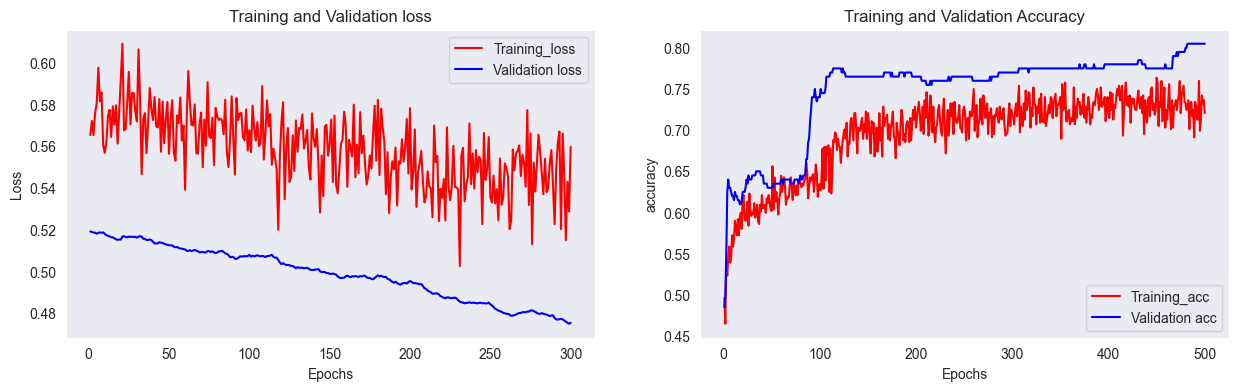

In [26]:
hist = history.history
acc=hist['accuracy']
a=200
b=len(acc)
val_loss=hist['val_loss'][a:b]
loss=hist['loss'][a:b]
val_acc=hist['val_accuracy']
epc = range(1,(b-a)+1)

plt.figure(figsize=(15,4))
plt.clf()
plt.subplot(1,2,1)
plt.plot(epc, loss, 'r', label='Training_loss')
plt.plot(epc, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epc=range(1,len(acc)+1)
plt.subplot(1,2,2)
plt.plot(epc, acc, 'r', label='Training_acc')
plt.plot(epc, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()


plt.show()

In [27]:
model=models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6 ,momentum=0.9)
# adm = optimizers.Adam(lr=0.1, decay=1e-6)
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(trainData, trainLabels,
                   epochs=500,
                   batch_size=32,
                   verbose=1)

Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 0.7498 - accuracy: 0.5118
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.7440 - accuracy: 0.5219
Epoch 3/500
28/28 [==============================] - 0s 5ms/step - loss: 0.7213 - accuracy: 0.5488
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5499
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5870
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6150
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.6049
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6229
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6397
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.6622
Epoch 11/

In [28]:
result=model.evaluate(x_test,y_test)
result

6/6 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7933


[0.43816354870796204, 0.7932960987091064]

In [29]:
prediction=model.predict(testData)
prediction

14/14 [==============================] - 0s 1ms/step


array([[0.14718232],
       [0.3254752 ],
       [0.14597066],
       [0.15479252],
       [0.38328123],
       [0.16977762],
       [0.41077164],
       [0.2558495 ],
       [0.51088685],
       [0.17494325],
       [0.1827914 ],
       [0.2843632 ],
       [0.9540143 ],
       [0.15094528],
       [0.95205396],
       [0.82954526],
       [0.19529048],
       [0.1586447 ],
       [0.3846788 ],
       [0.383304  ],
       [0.24375482],
       [0.21892859],
       [0.95547974],
       [0.42132798],
       [0.93062896],
       [0.12510066],
       [0.9523245 ],
       [0.15712586],
       [0.331096  ],
       [0.22165388],
       [0.17966643],
       [0.22072689],
       [0.3517406 ],
       [0.5060267 ],
       [0.36600462],
       [0.1612091 ],
       [0.5977385 ],
       [0.49906862],
       [0.15807445],
       [0.25773773],
       [0.17125948],
       [0.40662065],
       [0.14198777],
       [0.8502896 ],
       [0.95135784],
       [0.1556768 ],
       [0.29709995],
       [0.182

In [30]:
pred=[1 if prediction[i]>0.25 else 0 for i in range(len(testData))]
pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [31]:
res=pd.DataFrame()
survivalData=pd.read_csv('./dataSet/gender_submission.csv')
survivalData

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [32]:
res['PassengerId']=out_targets
res['Survived']=pred
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
res.to_csv("Submission.csv",index=False)

In [34]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("titanicSurvivalPred.h5")